In [71]:
#learn a (1D) curve

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

import mpld3
mpld3.enable_notebook()

In [72]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,2)
        #self.fc2 = nn.Linear(10,10)
        self.fc3 = nn.Linear(2,1)
        self.act = F.relu
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        #x = self.fc2(x)
        #x = self.act(x)
        x = self.fc3(x)
        return x

In [73]:
def f(x):
    return 500*torch.sin(x) + 1000

def noise(x):
    return 0



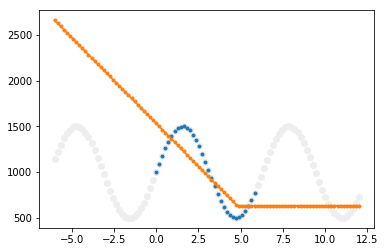

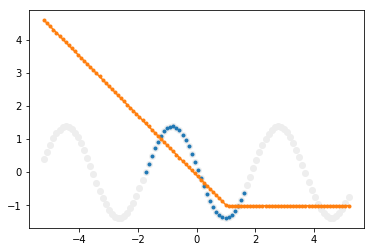

In [74]:
net = Net()
mse = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

x = Variable(torch.rand(10000,1)*6)
mean = x.mean()
std = x.std()

y_ = f(x)
ymean = y_.mean()
ystd = y_.std()

normalizeX = True
normalizeY = True

for _ in range(4000):
    x = Variable(torch.rand(10,1)*6)
    y_ = f(x)
    
    if normalizeX:
        x = (x-mean)/std
    if normalizeY:
        y_ = (y_-ymean)/ystd
    
    y = net(x)
    loss = mse(y, y_)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#test data
x = Variable(torch.linspace(-6,12).resize_(100,1))
y_ = f(x)
y = net(x)

if normalizeX:
    x1 = (x-mean)/std
else:
    x1 = x

if normalizeY:
    y1_= (y_-ymean)/ystd
    y1 = net(x1)
    y = y1*ystd+ymean
else:
    y1_= y_
    y1 = net(x1)


#plt.subplot(211)
plt.plot(x.data.numpy(), y_.data.numpy(), 'o',c='#eeeeee')
plt.plot(x.data.numpy()[33:66], y_.data.numpy()[33:66], '.')
plt.plot(x.data.numpy(), y.data.numpy(), '.-')
# plt.subplot(212)
plt.figure()
plt.plot(x1.data.numpy(), y1_.data.numpy(), 'o',c='#eeeeee')
plt.plot(x1.data.numpy()[33:66], y1_.data.numpy()[33:66], '.')
plt.plot(x1.data.numpy(), y1.data.numpy(), '.-')
plt.show()

In [70]:
for i in list(net.parameters()):
    print i
    pass

Parameter containing:
-0.2875
-0.9444
[torch.FloatTensor of size 2x1]

Parameter containing:
-0.6724
 0.9939
[torch.FloatTensor of size 2]

Parameter containing:
-0.0159  0.9642
[torch.FloatTensor of size 1x2]

Parameter containing:
-1.0198
[torch.FloatTensor of size 1]



In [ ]:
x